<a id='main'></a>
# Supervised Summary

This is a little hands-on summary of some notable supervised machine learning algorithms and how to implement/finetune them. As only one dataset was used for classification and regression each, some models are misrepresented. They would yield much better results for other datasets.

In [157]:
#import base pacakges
import numpy as np
import matplotlib.pyplot as plt

## table of contents:
* [0. Datasets](#ch0)
    * diabetes and digits dataset of sklearn
* [1. k-nearast neighbors (knn)](#ch1)
    * For small datasets, good as a baseline, easy to explain. 
* [2.linear models](#ch2)
    * Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data. 
* [3. Naive Bayes](#ch3)
    * Only for classification. Even faster than linear models, good for very large datasets and high-dimensional data. Often less accurate than linear models. 
* [4. Decision Trees](#ch4)
    * Very fast, don’t need scaling of the data, can be visualized and easily explained.
* [5. Random Trees](#ch5)
    * In regards of classification and regression among the most widely used algorithms. Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data. Not good for very high-dimensional sparse data. 

* [6. Gradient boosted regression trees (gradient boosting machines)](#ch6)
    * Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.
* [7. Support vector machines](#ch7)
    * Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data. 
* [8. Neural Networks (deep learning)](#ch8)
    * Can build very complex models, particularly for large datasets. Sensitive to scaling of the data (best mean=0 and std=1) and to the choice of parameters. Large models need a long time to train.

<a id='ch0'></a>
# Datasets

## Classification Dataset

In [111]:
#load dataset
from sklearn.datasets import load_digits
digits=load_digits()
print("digits.keys():\n", digits.keys())

digits.keys():
 dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [112]:
# data set description
i=70
print(digits['DESCR'][:i]+ "\n...") #increase i for more info

.. _digits_dataset:

Optical recognition of handwritten digits dataset
...


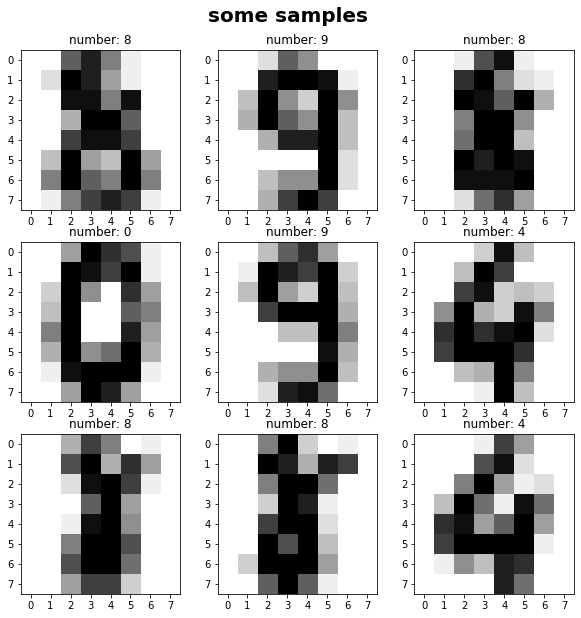

In [113]:
# plot samples
fig,axes =plt.subplots(3,3, figsize=(10, 10))
fig.suptitle('some samples', fontsize=20, fontweight='bold',y=.94)
for i,ax in zip(range(1,10),axes.ravel()):
    ax.xaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.yaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.imshow(digits.images[-i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("number: {:}".format(digits.target[-i]))

In [114]:
#amount of samples and features per sample
print("Shape of digit data:", digits.data.shape)

Shape of digit data: (1797, 64)


In [115]:
#target names
print("Target names:",digits.target_names)

Target names: [0 1 2 3 4 5 6 7 8 9]


In [116]:
#sample counts per class
print("Sample counts per class:\n",
      {n: v for n, v in zip(digits.target_names, np.bincount(digits.target))})

Sample counts per class:
 {0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


In [117]:
#splitting data in test and train datasets
from sklearn.model_selection import train_test_split
cla_X_train, cla_X_test, cla_y_train, cla_y_test = train_test_split(
    digits['data'], digits['target'], random_state=0) #random_state is seed for random number generation

## Regression Dataset 

In [118]:
#load dataset
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
print("diabetes.keys():\n", diabetes.keys())

diabetes.keys():
 dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [119]:
# data set description
i=326
print(digits['DESCR'][:i]+ "\n...") #increase i for more info

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
...


In [120]:
#amount of samples and features per sample
print("Shape of digit data:", digits.data.shape)

Shape of digit data: (1797, 64)


In [121]:
#target names
print("Target names:", diabetes.feature_names)

Target names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [122]:
#splitting data in test and train datasets
from sklearn.model_selection import train_test_split
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(
    diabetes['data'], diabetes['target'], random_state=0) #random_state is seed for random number generation

<a id='ch1'></a>
# 1. k-nearast neighbors (knn) [return to overview](#main)

#### For small datasets, good as a baseline, easy to explain. 

### knn classifier

In [123]:
#Import
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
#Train
knn.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(knn.score(cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(knn.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",KNeighborsClassifier())

Training set score: 0.99
Test set score: 0.99

 Possible Modifications: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


# Example for Outputting Predictions of Classifier

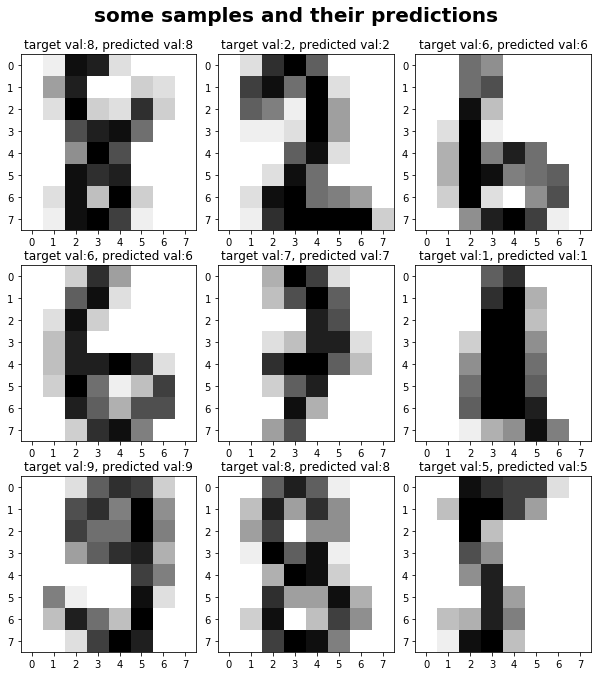

In [124]:
# plot samples
fig,axes =plt.subplots(3,3, figsize=(11, 11))
plt.subplots_adjust(wspace=-0.1)
fig.suptitle('some samples and their predictions', fontsize=20, fontweight='bold',y=.94)
for i,ax in zip(range(1,10),axes.ravel()):
    pic=cla_X_test[i].reshape(8,8)
    ax.xaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.yaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.imshow(pic, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("target val:{:}, predicted val:{:}".format(cla_y_test[i],knn.predict(cla_X_test)[i]))

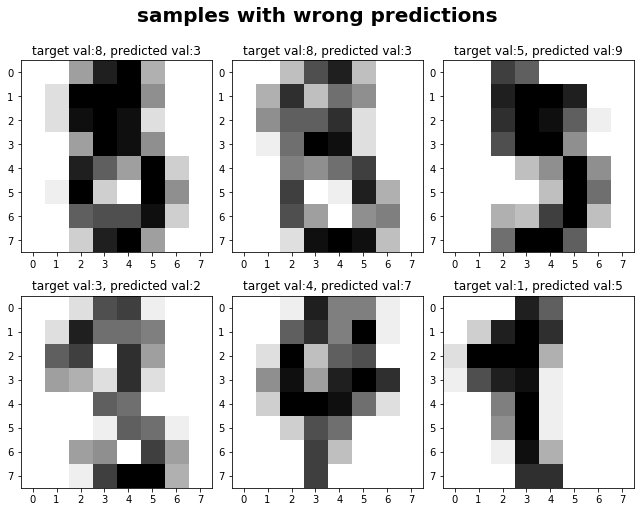

In [125]:
# show samples with wrong predictions
wrong=np.where(knn.predict(cla_X_test)!=cla_y_test)[0]

# plot nine samples
fig,axes =plt.subplots(2,3, figsize=(11, 11))
plt.subplots_adjust(wspace=0.1,hspace=-0.35)
fig.suptitle('samples with wrong predictions', fontsize=20, fontweight='bold',y=.84)
for i,ax in zip(wrong,axes.ravel()):
    pic=cla_X_test[i].reshape(8,8)
    ax.xaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.yaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.imshow(pic, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("target val:{:}, predicted val:{:}".format(cla_y_test[i],knn.predict(cla_X_test)[i]))

In [503]:
#Test predition for first ten results.
print("Predicted results:")
for x in tuple(zip(knn.predict(cla_X_test),digits['target_names'][cla_y_test]))[0:10]: 
    print(x) 

Predicted results:
(2, 2)
(8, 8)
(2, 2)
(6, 6)
(6, 6)
(7, 7)
(1, 1)
(9, 9)
(8, 8)
(5, 5)


In [504]:
# predicted probabilities for predictions of samples 65 to 70. Also available for other algorithms. Try it out!
print("Predicted probabilities:")
for i in range(65,71):
    print(knn.predict_proba(cla_X_test)[i])

Predicted probabilities:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.         0.         0.33333333 0.33333333 0.         0.
 0.         0.33333333 0.         0.        ]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [128]:
print("Decision function:\n{}".format(knn.decision_function(cla_X_test)[:6]))


AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

### knn regressor


In [ ]:
#Import
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=30)
#Train
knn.fit(reg_X_train, reg_y_train)
#Test
print("Training set score: {:.2f}".format(knn.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(knn.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",KNeighborsRegressor())

<a id='ch2'></a>
# 2.linear models [return to overview](#main)

####  Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data. 

### linear Support Vector Classifier (SVC)

##### better for better dimenisions. generalizes. 

In [ ]:
#Import
from sklearn.svm import LinearSVC
lin = LinearSVC(max_iter=2000)
#Train
lin.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(lin.score(cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(lin.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",LinearSVC())

### logistic regression classification

##### usually similiarly good as SVC. Try regression first

In [ ]:
#Import
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01, max_iter=2000) #Modify C to prevent overfitting
#Train
log.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(log.score(cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(log.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",LogisticRegression())

### linear regression (aka ordinary least squares)

##### good for high dimensions (many features). Can´t learn anything from less than about 400 samples

In [ ]:
#Import
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#Train
lr.fit(X_train, y_train)
#Test
print("Training set score: {:.2f}".format(lr.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(lr.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",LinearRegression())


In [129]:
#Coefficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

### ridge regression

##### less likely to overfit than linear regression, as it generalizes more. Performace catches up for large sample sizes.

In [130]:
#Import
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.2)
#Train
ridge.fit(reg_X_train, reg_y_train)
#Test
print("Training set score: {:.2f}".format(ridge.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(ridge.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",Ridge())


Training set score: 0.54
Test set score: 0.38

 Possible Modifications: 
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


### lasso regression

##### ridge is usually better. lasso might be better for data with many features, where only few will be of importance

In [131]:
#Import
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.1)
#Train
las.fit(reg_X_train, reg_y_train)
#Test
print("Training set score: {:.2f}".format(las.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(las.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",Ridge())

Training set score: 0.55
Test set score: 0.36

 Possible Modifications: 
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


##### usually works best. combines ridge and lasso. Downside is that is has two parameters (alpha and l1_ratio) to adjust

In [132]:
#Import
from sklearn.linear_model import ElasticNet
eln = ElasticNet(alpha=0.001)
#Train
eln.fit(reg_X_train, reg_y_train)
#Test
print("Training set score: {:.2f}".format(eln.score(reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(eln.score(reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",ElasticNet())

Training set score: 0.55
Test set score: 0.38

 Possible Modifications: 
 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


<a id='ch3'></a>
# 3. Naive Bayes [return to overview](#main)

#### Only for classification. Even faster than linear models, good for very large datasets and high-dimensional data. Often less accurate than linear models. 

### Gaussian Naive Bayes:

##### usually used on very high dimensional data

In [133]:
#Import
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
#Train
gnb.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(gnb.score(cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(gnb.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",GaussianNB())

Training set score: 0.86
Test set score: 0.83

 Possible Modifications: 
 GaussianNB(priors=None, var_smoothing=1e-09)


### Other Naive Bayes:

#### Bernoulli Naive Bayes

In [134]:
#from sklearn.naive_bayes import BernoulliNB
#BernoulliNB()
# parameter alpha sets model complexity (generalization)

##### Assumes count data. Usually used for sparse data such as text.

#### Multinomial Naive Bayes

In [135]:
#from sklearn.naive_bayes import MultinomialNB
#MultinomialNB()
# parameter alpha sets model complexity (generalization)

##### Assumes binary data. Usually used for sparse data such as text. Usually performs better than Bernoulli, especially for datasets with a large number of nonzero features (like in large documents)

<a id='ch4'></a>
# 4. Decision Trees [return to overview](#main)

#### Very fast, don’t need scaling of the data, can be visualized and easily explained.

### Decision tree classifier

In [492]:
#Import
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0 , min_samples_leaf=4) 
# pre-pruning: 
# set max_depth (how many layers), 
# max_leaf_nodes (how many leaf nodes are allowed)
# min_samples_leaf (how many samples allowed in one leaf node) 
# for generalization
    
#Train
dtc.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(dtc.score(cla_X_train, cla_y_train))) 
print("Test set score: {:.2f}".format(dtc.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",DecisionTreeClassifier())

Training set score: 0.94
Test set score: 0.85

 Possible Modifications: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### visualize Tree

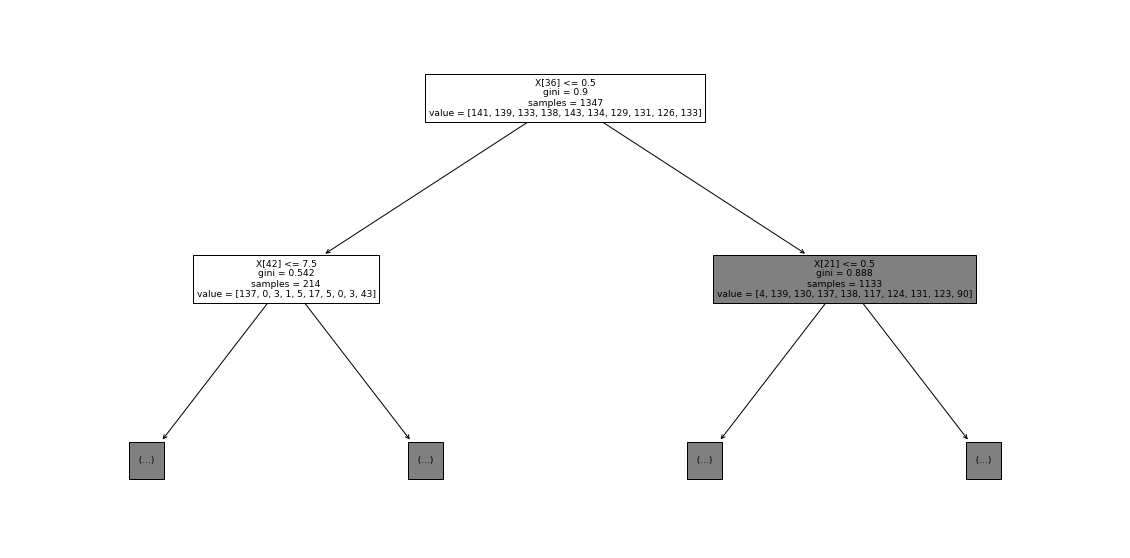

In [138]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtc, max_depth=1); 

or alternatively

In [139]:
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file="tree.dot", class_names=["{:02d}".format(x) for x in range(0,10)],
                feature_names=["pixel Nr.{:02d}".format(x) for x in range(1,65)], impurity=False, filled=True, max_depth=2)
# for full tree, remove max_depth parameter

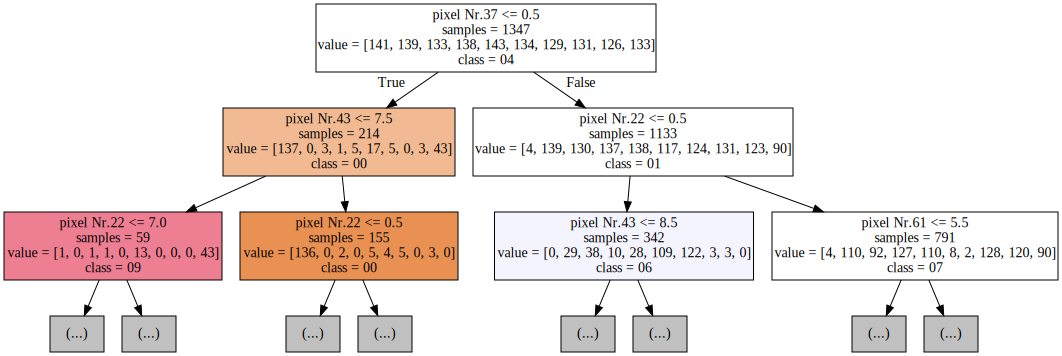

In [140]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
# for full tree, remove max_depth parameter

### show feature importances

In [141]:
print("Feature importances: \n",dtc.feature_importances_)

Feature importances: 
 [0.         0.         0.00411845 0.01278084 0.00641234 0.04767865
 0.         0.         0.         0.00157986 0.02503131 0.
 0.00946452 0.01502569 0.00043214 0.         0.         0.00158717
 0.00338126 0.0033483  0.05195221 0.10216679 0.0041391  0.
 0.         0.         0.06765748 0.07110942 0.00711778 0.0007558
 0.01690895 0.         0.         0.06765547 0.019748   0.
 0.08298289 0.02002657 0.         0.         0.         0.
 0.12875846 0.05916211 0.0061283  0.01064485 0.01030589 0.
 0.         0.0003995  0.01912663 0.0037515  0.00033305 0.0099442
 0.02554063 0.         0.         0.         0.01196284 0.
 0.06935317 0.00152787 0.         0.        ]


(-1, 64)

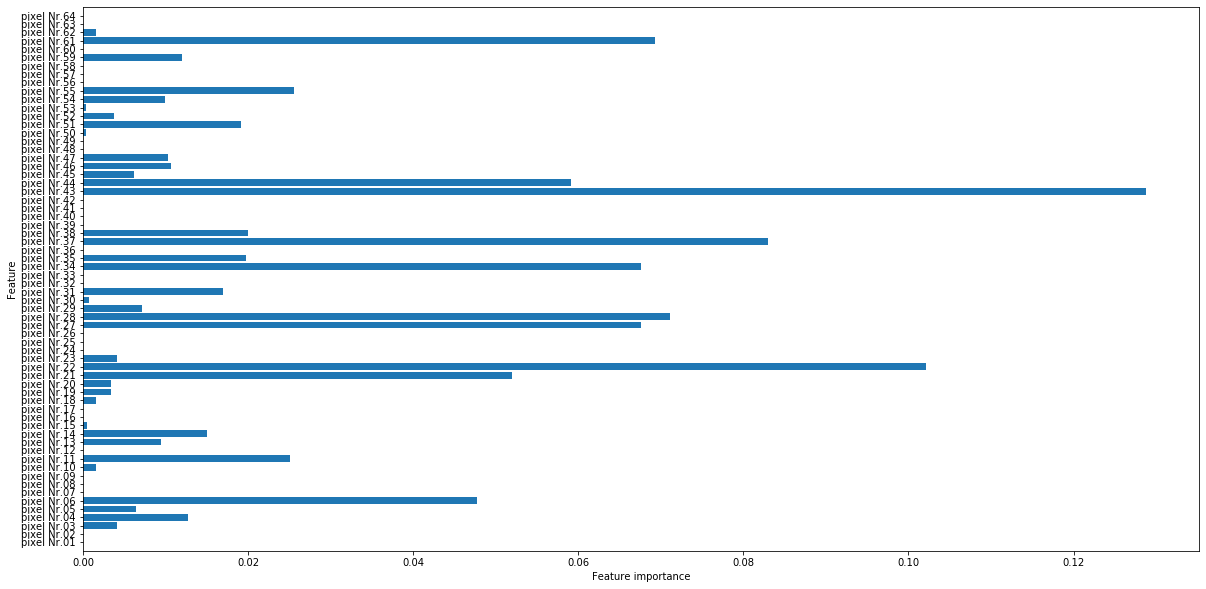

In [142]:
n_features = digits.data.shape[1]
plt.figure(figsize=(20,10))
plt.barh(np.arange(n_features), dtc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ["pixel Nr.{:02d}".format(x) for x in range(1,65)])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

<a id='ch5'></a>
# 5. Random Trees [return to overview](#main)

#### In regards of classification and regression among the most widely used algorithms. 
#### Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data. Not good for very high-dimensional sparse data. 

In [143]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
# usually standard paramters already work well
# set n_estimators (amount of trees) and max_features to prevent overfitting

# just like in regular trees max_depth, max_leaf_nodes and min_samples_leaf can be tuned for better generalization

#Train
rfc.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(rfc.score(cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(rfc.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",RandomForestClassifier())

Training set score: 1.00
Test set score: 0.98

 Possible Modifications: 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


<a id='ch6'></a>
# 6. Gradient boosted regression trees (gradient boosting machines)
# [return to overview](#main)

#### Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.25) # set max_depth and learning_rate for better generalization
#Train
gbc.fit(cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(gbc.score(cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(gbc.score(cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",GradientBoostingClassifier())

Training set score: 1.00
Test set score: 0.97

 Possible Modifications: 
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [501]:
# show decision function. Also available for some other algorithms. Try it out!
gbc.decision_function(cla_X_test)

array([[-11.15951136,  -6.06383504,  11.38573609, ...,  -8.48897862,
         -7.64374054,  -9.83855635],
       [-10.20544931,  -8.77760539,  -7.74015269, ..., -11.32031938,
          2.96918349,  -7.56709239],
       [-11.31716051,  -5.94061443,   6.95980084, ..., -10.55658044,
         -6.62839216, -10.05901155],
       ...,
       [-11.66013766,  -9.31656801,  -9.82213751, ..., -10.32419568,
         -9.42411191,  -4.70090291],
       [-10.57277137,   0.17267439,  -9.0778726 , ..., -12.31681058,
         -3.24850446, -10.93361268],
       [ -8.32632843, -10.02121561,  -9.56349362, ..., -10.43400711,
         -9.66317195,   5.04792548]])

<a id='ch7'></a>
# 7. Support vector machines [return to overview](#main)

#### Powerful for medium-sized (up to 10k samples) datasets of features with similar meaning. Requires scaling of data (0 to 1), sensitive to parameters. More samples become intense in terms of runtime and memory usage

#### Scaling

In [145]:
def scale(X):
# find min
    min_val=X.min(axis=0)
# find range
    range_val=(X-min_val).max(axis=0)
# subtract min and devide by range
    Y=(X-min_val)/range_val
# fix features with range 0
    Y[np.isnan(Y)]=0
# features should be scaled between 0 and 1 now
    return Y
scaled_cla_X_train=scale(cla_X_train)
scaled_cla_X_test=scale(cla_X_test)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [146]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10, gamma=0.1, random_state=0)
# set kernel, C and gamma for generalization
svc.fit(scaled_cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(svc.score(scaled_cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(svc.score(scaled_cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",SVC())

Training set score: 1.00
Test set score: 0.99

 Possible Modifications: 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


<a id='ch8'></a>
# 8. Neural Networks (deep learning) [return to overview](#main)

#### Can build very complex models, particularly for large datasets. Sensitive to scaling of the data (best mean=0 and std=1) and to the choice of parameters. Large models need a long time to train.

For more flexible and larger models in Python, try keras, lasagna or tensor-flow on the thenao library, instead of scikit-learn.
All popular deep-learning libraries also provide using GPU's, something that scikit doesn't offer. GPU´s accelarate calculations by 10x to 100x and are essential for large-scale datasets

#### Scaling

In [207]:
# Classifier Data
# load split
from sklearn.model_selection import train_test_split
# load dataset 
from sklearn.datasets import load_digits
digits_data=load_digits()['data']
# mean
min_digits=digits_data.mean(axis=0)
# std
mean_digits=digits_data.mean(axis=0)
# subtract mean and divide by std
scaled_digits=(digits_data-mean_digits)/mean_digits
# fix features with std 0 (if possible)
scaled_digits[np.isnan(scaled_digits)]=0
# split
scaled_cla_X_train, scaled_cla_X_test, scaled_cla_y_train, scaled_cla_y_test = train_test_split(scaled_digits, load_digits()['target'], random_state=0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [147]:
# Classifier Data
# find mean
mean_cla_X_train=cla_X_train.mean(axis=0)
# find std
std_X_train=cla_X_train.std(axis=0)
# subtract mean and devide by std
scaled_cla_X_train=(cla_X_train-mean_cla_X_train)/std_X_train
scaled_cla_X_test=(cla_X_test-mean_cla_X_train)/std_X_train
# fix features with std=0
scaled_cla_X_train[np.isnan(scaled_cla_X_train)]=0
scaled_cla_X_test[np.isnan(scaled_cla_X_test)]=0
# now features should have a mean of 0 and a std of 1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [176]:
# Regressor Data
# load split
from sklearn.model_selection import train_test_split
# load dataset 
from sklearn.datasets import load_diabetes
diabetes_data=load_diabetes()['data']
# mean
mean_diabetes=diabetes_data.mean(axis=0)
# std
std_diabetes=diabetes_data.std(axis=0)
scaled_diabetes=(diabetes_data-mean_diabetes)/std_diabetes
# fix features with std 0 (if possible)
scaled_diabetes[np.isnan(scaled_diabetes)]=0
# split
scaled_reg_X_train, scaled_reg_X_test, scaled_reg_y_train, scaled_reg_y_test = train_test_split(scaled_diabetes, load_diabetes()['target'], random_state=0)

## neural network classifier

In [212]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=1000, alpha=2.7,hidden_layer_sizes=(13,8), random_state=0)
# set solver. standard is 'adam', which works well in most cases, but needs scaled data. 
# 'lbgs' is more robust to unscaled data, but has a large processing time for large datasets or large models

# increase max_iter if warning received

# Many parameters to generalize. 
# Main: alpha, hidden_layer_sizes=(#neurons in first hidden layer,#neurons in second hidden layer,#neu...])
# best to overfit and then reduce hidden layers and #neurons

#activation function in the neruon activation= 'tanh' or the standard 'relu'. Both works

mlpc.fit(scaled_cla_X_train, cla_y_train)
#Test
print("Training set score: {:.2f}".format(mlpc.score(scaled_cla_X_train, cla_y_train)))
print("Test set score: {:.2f}".format(mlpc.score(scaled_cla_X_test, cla_y_test)))

print("\n Possible Modifications: \n",MLPClassifier())

Training set score: 0.99
Test set score: 0.96

 Possible Modifications: 
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


''

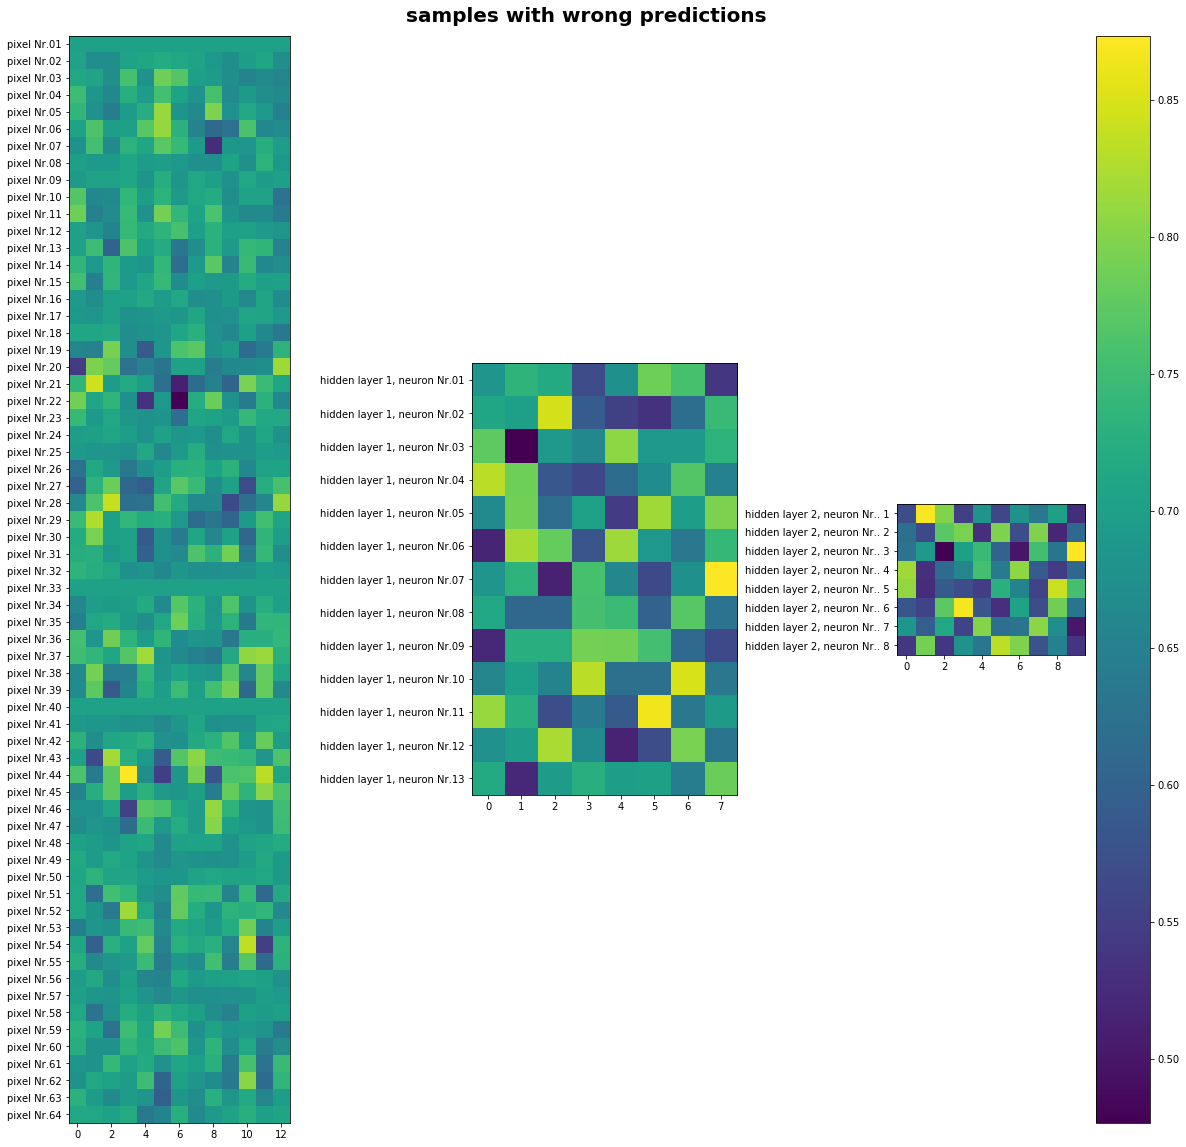

In [490]:
fig,axes =plt.subplots(1,3, figsize=(20, 20))
plt.subplots_adjust(wspace=0.6,hspace=1.0)
fig.suptitle('samples with wrong predictions', fontsize=20, fontweight='bold',y=.9)
axes[0].imshow(mlpc.coefs_[0], interpolation='none', cmap='viridis')
axes[0].yaxis.set_ticks(range(len(mlpc.coefs_[0])))
axes[0].set_yticklabels(["pixel Nr.{:02d}".format(x) for x in range(1,len(mlpc.coefs_[0])+1)])
axes[1].imshow(mlpc.coefs_[1], interpolation='none', cmap='viridis')
axes[1].yaxis.set_ticks(range(len(mlpc.coefs_[1])))
axes[1].set_yticklabels(["hidden layer 1, neuron Nr.{:02d}".format(x) for x in range(1,len(mlpc.coefs_[1])+1)])
axes[2].imshow(mlpc.coefs_[2], interpolation='none', cmap='viridis')
axes[2].yaxis.set_ticks(range(len(mlpc.coefs_[2])))
axes[2].set_yticklabels(["hidden layer 2, neuron Nr..{:2d}".format(x) for x in range(1,len(mlpc.coefs_[2])+1)])

sm = plt.cm.ScalarMappable(cmap='viridis', 
norm=plt.Normalize(vmin=min([np.amax(mlpc.coefs_[0]),np.amax(mlpc.coefs_[1]),np.amax(mlpc.coefs_[2])]), vmax=max([np.amax(mlpc.coefs_[0]),np.amax(mlpc.coefs_[1]),np.amax(mlpc.coefs_[2])])))
plt.colorbar(sm,fraction=0.25, pad=0.04)

;

## neural network regressor

In [200]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(max_iter=50000,alpha=1000,hidden_layer_sizes=(100), random_state=0)
# set solver. standard is 'adam', which works well in most cases, but needs scaled data. 
# 'lbgs' is more robust to unscaled data, but has a large processing time for large datasets or large models

# increase max_iter if warning received

# Many parameters to generalize. 
# Main: alpha, hidden_layer_sizes=(#neurons in first hidden layer,#neurons in second hidden layer,#neu...])
# best to overfit and then reduce hidden layers and #neurons

#activation function in the neruon activation= 'tanh' (nonlinear data) or the standard 'relu' (linear data)

mlpr.fit(scaled_reg_X_train, reg_y_train)
#Test
print("Training set score: {:.2f}".format(mlpr.score(scaled_reg_X_train, reg_y_train)))
print("Test set score: {:.2f}".format(mlpr.score(scaled_reg_X_test, reg_y_test)))

print("\n Possible Modifications: \n",MLPRegressor())

Training set score: 0.57
Test set score: 0.38

 Possible Modifications: 
 MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
